# ESRI Landcover Classification

* **Products used:** 
[io_lulc](https://explorer.digitalearth.africa/products/io_lulc)

## Background

**L**and **U**se/**L**and **C**over (LULC) maps classify land into broad categories such as water, crops, or built area. They are useful for visualising the dominant land uses in a given area. The total area or proportion of different classes can also be calculated for a specified area.

Many organisations publish LULC maps. [The Environmental Systems Research Institute (Esri)](https://www.arcgis.com/home/item.html?id=d6642f8a4f6d4685a24ae2dc0c73d4ac) product is available on the Digital Earth Africa Platform. This product is derived from ESA Sentinel-2 imagery.

**Important details:**

* Datacube product name: `io_lulc`
* Classes
    * The range of integers corresponding to LULC classes is `0` - `10`.
    * `0`: `no data`
    * `1`: `water`
    * `2`: `trees`
    * `3`: `grass`
    * `4`: `flooded vegetation`
    * `5`: `crops`
    * `6`: `scrub/shrub`
    * `7`: `built area`
    * `8`: `bare ground`
    * `9`: `snow/ice`
    * `10`: `clouds`
    
* Status: Operational
* Date-range: 2020
* Spatial resolution: 10m 

## Description

In this notebook we will load LULC data using `dc.load()` to return a map of land use and land cover classes for a specified area.

Topics covered include:
1. Inspecting the LULC product available in the datacube
2. Using the native `dc.load()` function to load in LULC data
3. An example of simple land use analysis

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages

In [15]:
%matplotlib inline

import datacube

from matplotlib import colors as mcolours
import numpy as np

### Connect to the datacube

In [7]:
dc = datacube.Datacube(app="ESRI_Landcover_Classification")

### List measurements

We can inspect the data available for LULC using datacube's `list_measurements` functionality. The table below lists each of the measurements available in the data. We can see that the product contains one layer named 'data'. The datatype is integer, which corresponds to a LULC class, and the alias is 'classification'.

In [11]:
product_name = 'io_lulc'

dc_measurements = dc.list_measurements()
dc_measurements.loc[product_name].drop('flags_definition', axis=1)

,name,dtype,units,nodata,aliases
measurement,,,,,
data,data,uint8,1,0.0,[classification]


## Load ESRI Landcover Classification for Madagascar

In [12]:
product = "io_lulc"
# This is a point in Madagascar
lat, lon = -19.455748, 46.464421
buf = 5
lons = (lon - buf, lon + buf)
lats = (lat - buf, lat + buf)

# Load the data at 500 m resolution, so that it's fast.
ds = dc.load(
    product=product,
    longitude=lons,
    latitude=lats,
    resolution=(-500, 500),
    output_crs="epsg:6933",
    dask_chunks={}
)

/env/lib/python3.8/site-packages/datacube/utils/geometry/_base.py:608: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return type(geom)([segmentize_shapely(g) for g in geom])


In [13]:
ds

<xarray.Dataset>
Dimensions:      (time: 1, y: 2407, x: 1931)
Coordinates:
  * time         (time) datetime64[ns] 2020-07-02
  * y            (y) float64 -1.825e+06 -1.826e+06 ... -3.028e+06 -3.028e+06
  * x            (x) float64 4.001e+06 4.001e+06 ... 4.965e+06 4.966e+06
    spatial_ref  int32 6933
Data variables:
    data         (time, y, x) uint8 dask.array<chunksize=(1, 2407, 1931), meta=np.ndarray>
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref

### Plotting data

We can plot LULC for Madagascar and add a legend which corresponds to the classes. We can see that trees dominate the eastern areas of the island, while scrub/shrub is more prevalent on the western side. We can also identify a few cities/towns with the red 'built area' class.

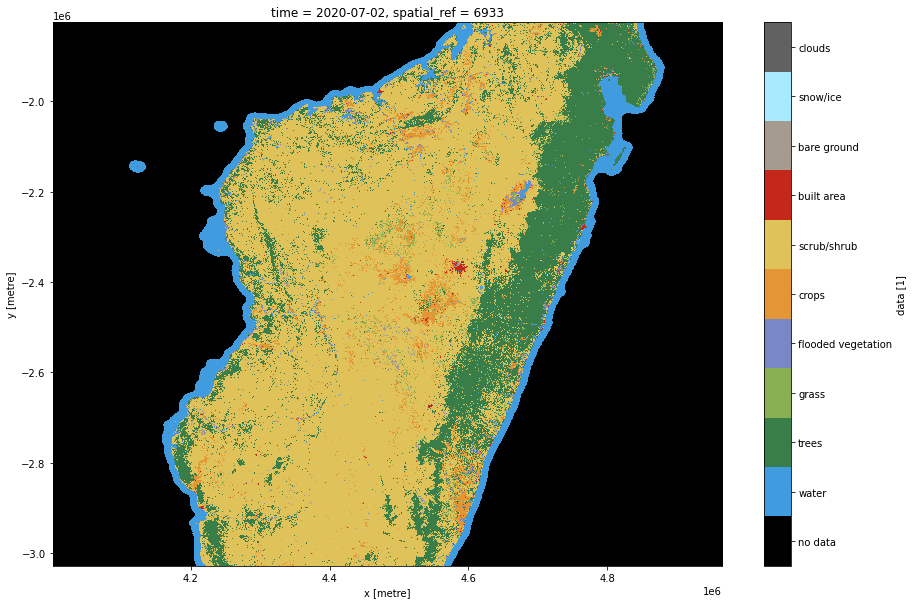

In [48]:
# Colour it like the ESRI colour map
cmap = mcolours.ListedColormap([
      np.array([0, 0, 0]) / 255,
      np.array([65, 155, 223]) / 255,
      np.array([57, 125, 73]) / 255,
      np.array([136, 176, 83]) / 255,
      np.array([122, 135, 198]) / 255,
      np.array([228, 150, 53]) / 255,
      np.array([223, 195, 90]) / 255,
      np.array([196 ,40, 27]) / 255,
      np.array([165, 155, 143]) / 255,
      np.array([168, 235, 255]) / 255,
      np.array([97, 97, 97]) / 255
])
bounds=range(0,12)
norm = mcolours.BoundaryNorm(np.array(bounds), cmap.N)

# Add class labels to include in plot legend
cblabels = ['no data', 'water', 'trees', 'grass', 'flooded vegetation', 'crops', 'scrub/shrub', 'built area', 'bare ground', 'snow/ice', 'clouds']
im = ds.isel(time=0).data.plot.imshow(cmap=cmap, norm=norm, size=10)
cb = im.colorbar
loc= np.arange(0,12,1)+0.5
cb.set_ticks(loc)
cb.set_ticklabels(cblabels)
im

---

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to repoart an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:**

In [49]:
print(datacube.__version__)

1.8.6


In [50]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2021-10-26'